# Flight Price Feature Engineering & EDA

## Import requirments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import the DataSet

In [2]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### summarize the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Check columns

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Split the Date_of_Journey column

In [5]:
df["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [6]:
df["Date"]=df["Date_of_Journey"].str.split("/").str[0]
df["Month"]=df["Date_of_Journey"].str.split("/").str[1]
df["Year"]=df["Date_of_Journey"].str.split("/").str[2]

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


#### Now drop the "Date_of_Journey" column

In [8]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [9]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


### As we already have Source and Destinations, Drop the Route column

In [10]:
df.drop("Route",axis=1,inplace=True)

In [11]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


### Split Dep_Time column

In [12]:
df["Dep_Hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_Minute"]=df["Dep_Time"].str.split(":").str[1]

In [13]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


#### Now, as we have seperate columns for Dep Hour and Dep Minute, Drop Dep_Time

In [14]:
df.drop("Dep_Time",axis=1,inplace=True)

In [15]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


### Now split the Arrival_Time column

In [16]:
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]

In [17]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,01:10,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,04:25,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


In [18]:
df["Arrival_Hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_Minute"]=df["Arrival_Time"].str.split(":").str[1]

In [19]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,01:10,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,04:25,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10


#### Now drop the Arrival_Time column

In [20]:
df.drop("Arrival_Time",axis=1,inplace=True)

In [21]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10


### Now let's convert Duration into minutes

In [22]:
df["Duration_Hours"]=df["Duration"].str.split("h").str[0]
df["Duration_Minutes"]=df["Duration"].str.split("h").str[1].str.split("m").str[0]

In [23]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,09,25,04,25,19,
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,04,2019,08,20,11,20,3,
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10,2,40


In [24]:
def func(x):
    if x=="":
        return 0
    else:
        return x

In [25]:
df["Duration_Minutes"]=df["Duration_Minutes"].apply(func)

In [26]:
df=df[df["Duration_Hours"]!="5m"]

In [27]:
df["Duration_Hours"]=df["Duration_Hours"].astype(int)
df["Duration_Minutes"]=df["Duration_Minutes"].astype(int)

In [28]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,09,25,04,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,04,2019,08,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10,2,40


In [29]:
df["Total_Duration_In_Minutes"]=(60*df["Duration_Hours"])+df["Duration_Minutes"]

In [30]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Total_Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,09,25,04,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25,2,30,150
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20,2,35,155
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,04,2019,08,20,11,20,3,0,180
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10,2,40,160


#### Now we can drop Duration , Duration_hours and Duration_minutes columns

In [31]:
df.drop(["Duration","Duration_Hours","Duration_Minutes"],axis=1,inplace=True)

In [32]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,05,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,2019,09,25,04,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,2019,18,05,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,04,2019,19,55,22,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,04,2019,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,04,2019,08,20,11,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,01,03,2019,11,30,14,10,160


### Now change Total_Stops to Numeric Values

In [33]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:
df["Total_Stops"].isnull().sum()

1

In [35]:
modee=df["Total_Stops"].mode()
modee

0    1 stop
Name: Total_Stops, dtype: object

In [36]:
df["Stops"]=df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [37]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,22,20,01,10,170,0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,05,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,2019,09,25,04,25,1140,2
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,2019,18,05,23,30,325,1
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,2019,16,50,21,35,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,04,2019,19,55,22,25,150,0
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,04,2019,20,45,23,20,155,0
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,04,2019,08,20,11,20,180,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,01,03,2019,11,30,14,10,160,0


### Now Drop Total_Stops column

In [38]:
df.drop("Total_Stops",axis=1,inplace=True)

In [39]:
df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops
0,IndiGo,Banglore,New Delhi,No info,3897,24,03,2019,22,20,01,10,170,0
1,Air India,Kolkata,Banglore,No info,7662,1,05,2019,05,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,06,2019,09,25,04,25,1140,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,05,2019,18,05,23,30,325,1
4,IndiGo,Banglore,New Delhi,No info,13302,01,03,2019,16,50,21,35,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,4107,9,04,2019,19,55,22,25,150,0
10679,Air India,Kolkata,Banglore,No info,4145,27,04,2019,20,45,23,20,155,0
10680,Jet Airways,Banglore,Delhi,No info,7229,27,04,2019,08,20,11,20,180,0
10681,Vistara,Banglore,New Delhi,No info,12648,01,03,2019,11,30,14,10,160,0


### Now let's handle Additional_Info

In [40]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### As most of the data is of NO INFO, let's delete this column

In [42]:
df.drop("Additional_Info",axis=1,inplace=True)

In [43]:
df

,Airline,Source,Destination,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops
0,IndiGo,Banglore,New Delhi,3897,24,03,2019,22,20,01,10,170,0
1,Air India,Kolkata,Banglore,7662,1,05,2019,05,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,13882,9,06,2019,09,25,04,25,1140,2
3,IndiGo,Kolkata,Banglore,6218,12,05,2019,18,05,23,30,325,1
4,IndiGo,Banglore,New Delhi,13302,01,03,2019,16,50,21,35,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,04,2019,19,55,22,25,150,0
10679,Air India,Kolkata,Banglore,4145,27,04,2019,20,45,23,20,155,0
10680,Jet Airways,Banglore,Delhi,7229,27,04,2019,08,20,11,20,180,0
10681,Vistara,Banglore,New Delhi,12648,01,03,2019,11,30,14,10,160,0


### As price is Target Column, Lets create another column for price at last and drop the current one

In [44]:
df["Amount"]=df["Price"]
df.drop("Price",axis=1,inplace=True)

In [45]:
df

,Airline,Source,Destination,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops,Amount
0,IndiGo,Banglore,New Delhi,24,03,2019,22,20,01,10,170,0,3897
1,Air India,Kolkata,Banglore,1,05,2019,05,50,13,15,445,2,7662
2,Jet Airways,Delhi,Cochin,9,06,2019,09,25,04,25,1140,2,13882
3,IndiGo,Kolkata,Banglore,12,05,2019,18,05,23,30,325,1,6218
4,IndiGo,Banglore,New Delhi,01,03,2019,16,50,21,35,285,1,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,04,2019,19,55,22,25,150,0,4107
10679,Air India,Kolkata,Banglore,27,04,2019,20,45,23,20,155,0,4145
10680,Jet Airways,Banglore,Delhi,27,04,2019,08,20,11,20,180,0,7229
10681,Vistara,Banglore,New Delhi,01,03,2019,11,30,14,10,160,0,12648


## Now convert all the numeric values as INT

In [46]:
lst=['Date','Month','Year','Dep_Hour','Dep_Minute','Arrival_Hour','Arrival_Minute','Total_Duration_In_Minutes','Stops','Amount']

In [47]:
for i in lst:
    df[i]=df[i].astype(int)

In [48]:
df

,Airline,Source,Destination,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops,Amount
0,IndiGo,Banglore,New Delhi,24,3,2019,22,20,1,10,170,0,3897
1,Air India,Kolkata,Banglore,1,5,2019,5,50,13,15,445,2,7662
2,Jet Airways,Delhi,Cochin,9,6,2019,9,25,4,25,1140,2,13882
3,IndiGo,Kolkata,Banglore,12,5,2019,18,5,23,30,325,1,6218
4,IndiGo,Banglore,New Delhi,1,3,2019,16,50,21,35,285,1,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,4,2019,19,55,22,25,150,0,4107
10679,Air India,Kolkata,Banglore,27,4,2019,20,45,23,20,155,0,4145
10680,Jet Airways,Banglore,Delhi,27,4,2019,8,20,11,20,180,0,7229
10681,Vistara,Banglore,New Delhi,1,3,2019,11,30,14,10,160,0,12648


## Let's see whether they were converted to Int or not

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Airline                    10682 non-null  object
 1   Source                     10682 non-null  object
 2   Destination                10682 non-null  object
 3   Date                       10682 non-null  int64 
 4   Month                      10682 non-null  int64 
 5   Year                       10682 non-null  int64 
 6   Dep_Hour                   10682 non-null  int64 
 7   Dep_Minute                 10682 non-null  int64 
 8   Arrival_Hour               10682 non-null  int64 
 9   Arrival_Minute             10682 non-null  int64 
 10  Total_Duration_In_Minutes  10682 non-null  int64 
 11  Stops                      10682 non-null  int64 
 12  Amount                     10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


## Check for missing Data

In [50]:
df.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Date                         0
Month                        0
Year                         0
Dep_Hour                     0
Dep_Minute                   0
Arrival_Hour                 0
Arrival_Minute               0
Total_Duration_In_Minutes    0
Stops                        0
Amount                       0
dtype: int64

## Check for Duplicate Data

In [51]:
df.duplicated().sum()

222

## Drop the Duplicate Values

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.duplicated().sum()

0

In [54]:
df

,Airline,Source,Destination,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops,Amount
0,IndiGo,Banglore,New Delhi,24,3,2019,22,20,1,10,170,0,3897
1,Air India,Kolkata,Banglore,1,5,2019,5,50,13,15,445,2,7662
2,Jet Airways,Delhi,Cochin,9,6,2019,9,25,4,25,1140,2,13882
3,IndiGo,Kolkata,Banglore,12,5,2019,18,5,23,30,325,1,6218
4,IndiGo,Banglore,New Delhi,1,3,2019,16,50,21,35,285,1,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,4,2019,19,55,22,25,150,0,4107
10679,Air India,Kolkata,Banglore,27,4,2019,20,45,23,20,155,0,4145
10680,Jet Airways,Banglore,Delhi,27,4,2019,8,20,11,20,180,0,7229
10681,Vistara,Banglore,New Delhi,1,3,2019,11,30,14,10,160,0,12648


## Now, let's convert categorical values to Numerical

In [55]:
df["Airline"].nunique(),df["Source"].nunique(),df["Destination"].nunique()

(12, 5, 6)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label=LabelEncoder()

In [58]:
airlines=label.fit_transform(df[["Airline"]])
sources=label.fit_transform(df[["Source"]])
destinations=label.fit_transform(df[["Destination"]])

In [59]:
df["Airline_converted"]=airlines
df["Source_converted"]=sources
df["Destination_converted"]=destinations

In [60]:
df

,Airline,Source,Destination,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops,Amount,Airline_converted,Source_converted,Destination_converted
0,IndiGo,Banglore,New Delhi,24,3,2019,22,20,1,10,170,0,3897,3,0,5
1,Air India,Kolkata,Banglore,1,5,2019,5,50,13,15,445,2,7662,1,3,0
2,Jet Airways,Delhi,Cochin,9,6,2019,9,25,4,25,1140,2,13882,4,2,1
3,IndiGo,Kolkata,Banglore,12,5,2019,18,5,23,30,325,1,6218,3,3,0
4,IndiGo,Banglore,New Delhi,1,3,2019,16,50,21,35,285,1,13302,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,4,2019,19,55,22,25,150,0,4107,0,3,0
10679,Air India,Kolkata,Banglore,27,4,2019,20,45,23,20,155,0,4145,1,3,0
10680,Jet Airways,Banglore,Delhi,27,4,2019,8,20,11,20,180,0,7229,4,0,2
10681,Vistara,Banglore,New Delhi,1,3,2019,11,30,14,10,160,0,12648,10,0,5


In [61]:
df["Airline"].nunique(),df["Source"].nunique(),df["Destination"].nunique()

(12, 5, 6)

## Let's make 2 columns for Duration Minutes and Amount to use it as scaled Data

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()

In [64]:
df["Duration_Minutes_Scaled"]=scaler.fit_transform(df[["Total_Duration_In_Minutes"]])
df["Amount_Scaled"]=scaler.fit_transform(df[["Amount"]])

In [65]:
df

,Airline,Source,Destination,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_In_Minutes,Stops,Amount,Airline_converted,Source_converted,Destination_converted,Duration_Minutes_Scaled,Amount_Scaled
0,IndiGo,Banglore,New Delhi,24,3,2019,22,20,1,10,170,0,3897,3,0,5,0.034111,0.027497
1,Air India,Kolkata,Banglore,1,5,2019,5,50,13,15,445,2,7662,1,3,0,0.132855,0.075920
2,Jet Airways,Delhi,Cochin,9,6,2019,9,25,4,25,1140,2,13882,4,2,1,0.382406,0.155917
3,IndiGo,Kolkata,Banglore,12,5,2019,18,5,23,30,325,1,6218,3,3,0,0.089767,0.057348
4,IndiGo,Banglore,New Delhi,1,3,2019,16,50,21,35,285,1,13302,3,0,5,0.075404,0.148457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,4,2019,19,55,22,25,150,0,4107,0,3,0,0.026930,0.030198
10679,Air India,Kolkata,Banglore,27,4,2019,20,45,23,20,155,0,4145,1,3,0,0.028725,0.030687
10680,Jet Airways,Banglore,Delhi,27,4,2019,8,20,11,20,180,0,7229,4,0,2,0.037702,0.070351
10681,Vistara,Banglore,New Delhi,1,3,2019,11,30,14,10,160,0,12648,10,0,5,0.030521,0.140046


# Visualization

In [66]:
df["Year"].value_counts()

2019    10460
Name: Year, dtype: int64

## Only one year's Data is Given. i.e, For this data Year may not have much significance

In [67]:
df["Month"].value_counts()

5    3396
6    3311
3    2675
4    1078
Name: Month, dtype: int64

## Data is present for months March, April, May and June of 2019

In [68]:
df.groupby("Month")["Amount"].mean()

Month
3    10696.395140
4     5766.545455
5     9028.783569
6     8736.152522
Name: Amount, dtype: float64

## March has much flight ticket rates followed by May , June and April has the least

<AxesSubplot: xlabel='Stops', ylabel='Amount_Scaled'>

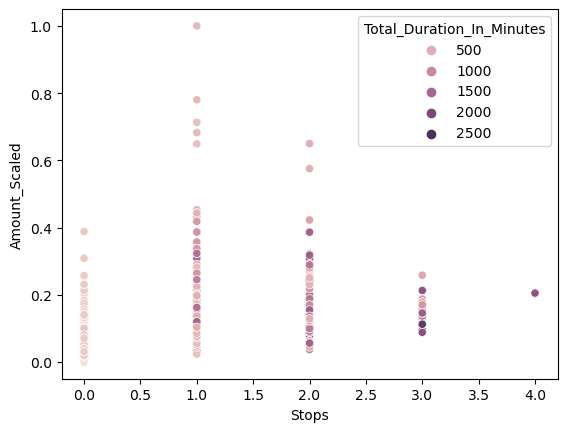

In [69]:
sns.scatterplot(y=df.Amount_Scaled,x=df.Stops,hue=df["Total_Duration_In_Minutes"])

## 
- Amount is less when there are "Zero" stops, and all the duration in minutes ranges beyond 500 only.
- Amount is slightly high if there is 1 stop compared to others, and all duration minutes are less than 1500.
- When there are 3 stops, amount is less but , Total Distance is more.


<AxesSubplot: xlabel='Total_Duration_In_Minutes', ylabel='Amount'>

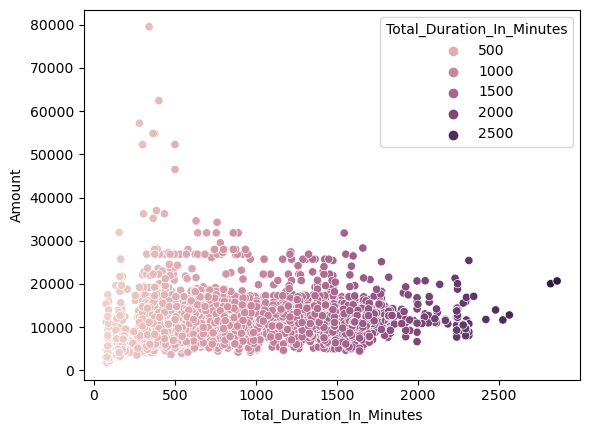

In [70]:
sns.scatterplot(y=df.Amount,x=df.Total_Duration_In_Minutes,hue=df["Total_Duration_In_Minutes"])

## Amount is high when Duration time is Less

<AxesSubplot: xlabel='Total_Duration_In_Minutes', ylabel='Amount'>

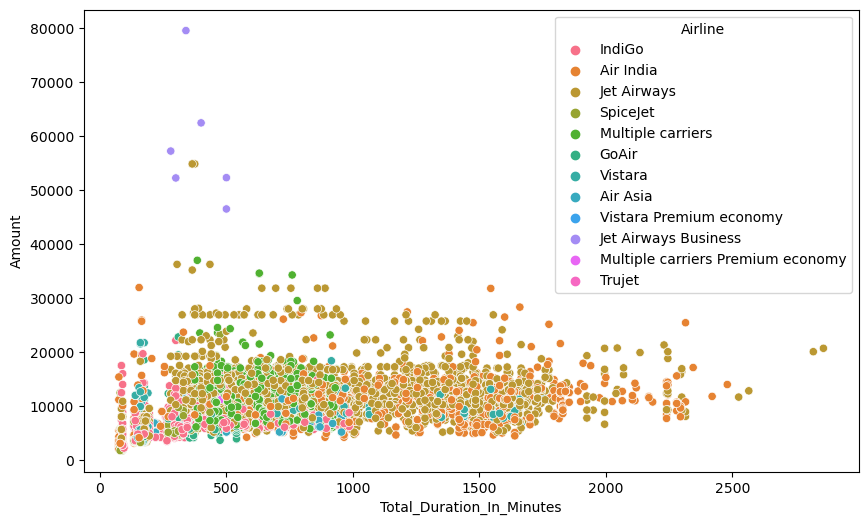

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df.Amount,x=df.Total_Duration_In_Minutes,hue=df["Airline"])

## 
- Amount of Jet Airway Business is High compared to others but the travel duration is very less
- Trujet covers only below 1000 minutes of duration
- Jet airways Dominates Airline Industry with more customers, followed by Air India and Trujet

<AxesSubplot: xlabel='Amount', ylabel='Month'>

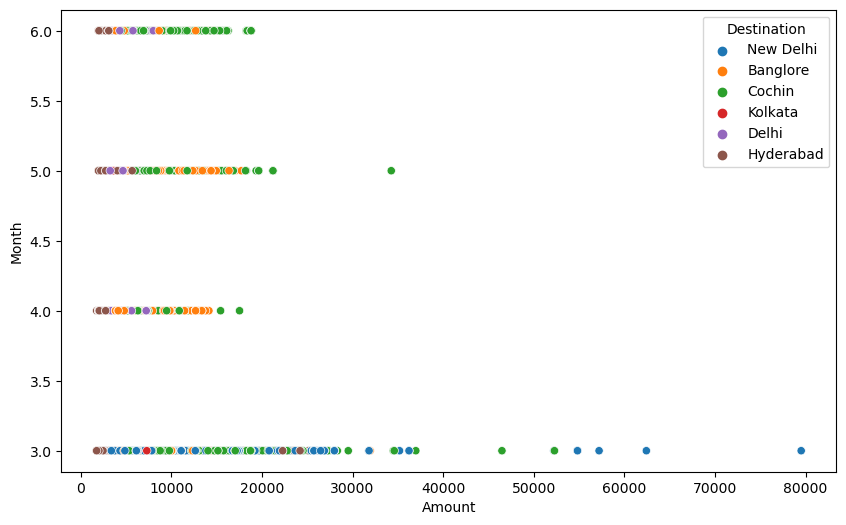

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df.Month,x=df.Amount,hue=df["Destination"])

## 
- on April most people were travelling to Delhi, and prices were also somewhat high
- Cochin is the most travelled place among all the Destinations.
- For Hydrebad most of the times Tickets were cheaper.

<AxesSubplot: xlabel='Dep_Hour', ylabel='Amount'>

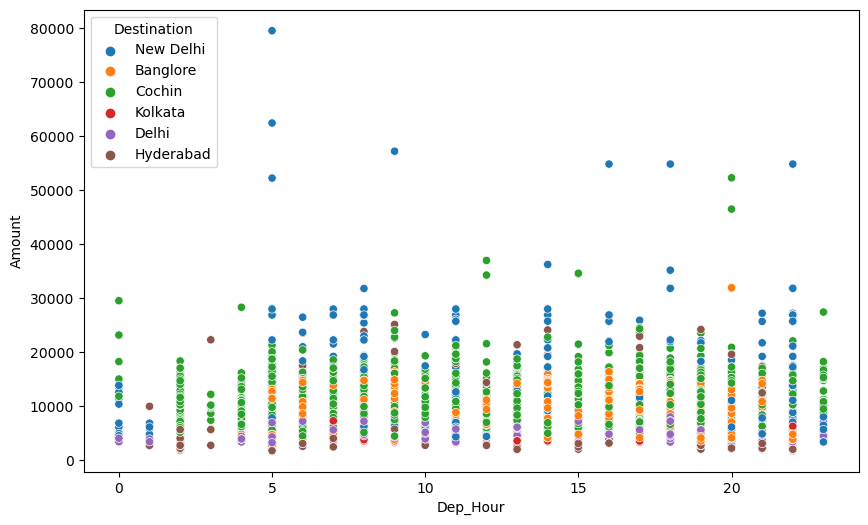

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Dep_Hour,y=df.Amount,hue=df["Destination"])

##
- Cochin is the most travelled place at most times
- Delhi has high prices in most of the times

<AxesSubplot: xlabel='Source', ylabel='Count'>

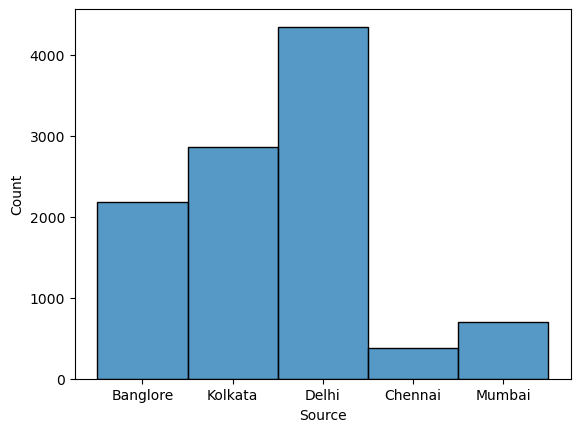

In [74]:
sns.histplot(df.Source)

<AxesSubplot: xlabel='Destination', ylabel='Count'>

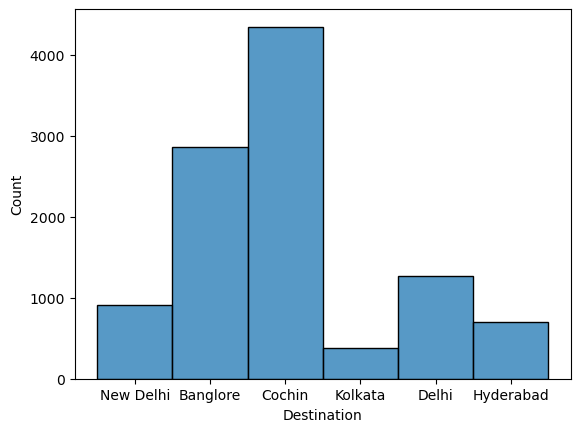

In [75]:
sns.histplot(df.Destination)

## 
- No one has started their flight from Hydrebad and Cochin
- No one travelled to Mumbai and Chennai

<AxesSubplot: xlabel='Dep_Hour', ylabel='Count'>

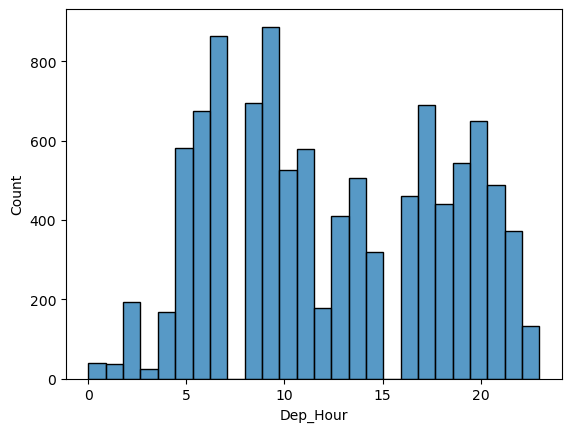

In [76]:
sns.histplot(df.Dep_Hour)

<AxesSubplot: xlabel='Arrival_Hour', ylabel='Count'>

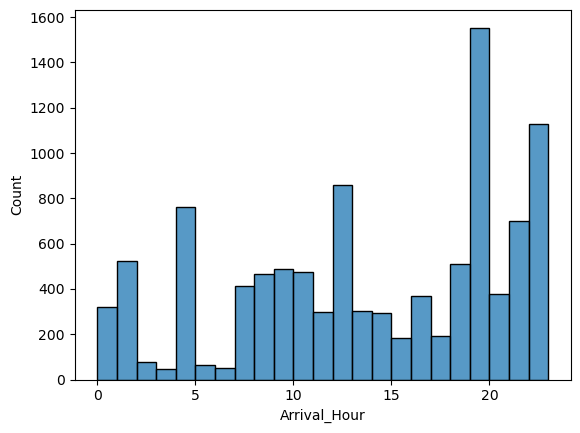

In [77]:
sns.histplot(df.Arrival_Hour)

## From mid night 12 to morning 6 people were less likely to arrive or departure

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

##
- Year of travel Has zero coreleation with all other features
- If total duration is increasing, then Stops were increasing
- If stops were increasing, them amount also increasing